# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- Pandas
- Matplotlib
- Numpy
- Seaborn

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [8]:
n = 500
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
random_categories = [random.choice(categories) for _ in range(n)]

In [9]:
random_likes = np.random.randint(0, 10000, size=n)

In [10]:
start_date = '2021-01-01'
date_range = pd.date_range(start_date, periods=n)

# Create the data dictionary
data = {
    'Date': date_range,
    'Category': random_categories,
    'Likes': random_likes
}

In [13]:
data

{'Date': DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
                '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
                '2021-01-09', '2021-01-10',
                ...
                '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
                '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
                '2022-05-14', '2022-05-15'],
               dtype='datetime64[ns]', length=500, freq='D'),
 'Category': ['Food',
  'Health',
  'Family',
  'Music',
  'Food',
  'Fitness',
  'Fitness',
  'Health',
  'Travel',
  'Food',
  'Fashion',
  'Music',
  'Health',
  'Fitness',
  'Music',
  'Culture',
  'Music',
  'Fashion',
  'Health',
  'Fitness',
  'Music',
  'Fitness',
  'Culture',
  'Food',
  'Fashion',
  'Family',
  'Health',
  'Music',
  'Health',
  'Food',
  'Health',
  'Culture',
  'Travel',
  'Fashion',
  'Family',
  'Health',
  'Culture',
  'Food',
  'Family',
  'Food',
  'Family',
  'Music',
  'Travel',
  'Culture',


In [14]:
df = pd.DataFrame(data)
df.head()

,Date,Category,Likes
0,2021-01-01,Food,4947
1,2021-01-02,Health,3185
2,2021-01-03,Family,2375
3,2021-01-04,Music,7376
4,2021-01-05,Food,2754


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [16]:
df.describe()

,Likes
count,500.000000
mean,4930.710000
std,2922.108049
min,34.000000
25%,2441.000000
50%,4918.000000
75%,7344.250000
max,9991.000000


In [17]:
category_counts = df['Category'].value_counts()
category_counts

Food       77
Health     71
Music      64
Culture    63
Family     62
Travel     61
Fitness    59
Fashion    43
Name: Category, dtype: int64

In [24]:
df.shape

(500, 3)

In [18]:
# Remove Null Data
df = df.dropna()

In [19]:
# Remove Duplicate Data
df = df.drop_duplicates()

In [20]:
# Convert the 'Date' Field to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Likes' Data to Integer
df['Likes'] = df['Likes'].astype(int)

In [21]:
df.head()

,Date,Category,Likes
0,2021-01-01,Food,4947
1,2021-01-02,Health,3185
2,2021-01-03,Family,2375
3,2021-01-04,Music,7376
4,2021-01-05,Food,2754


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.6+ KB


In [23]:
df.shape

(500, 3)

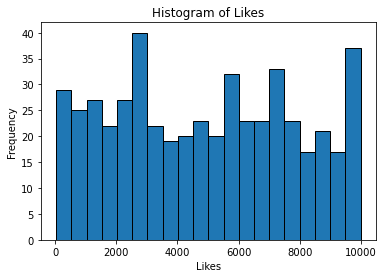

In [28]:
# Visualize the data with a histogram using Pandas
df['Likes'].plot(kind='hist', bins=20, edgecolor='k')
plt.title('Histogram of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

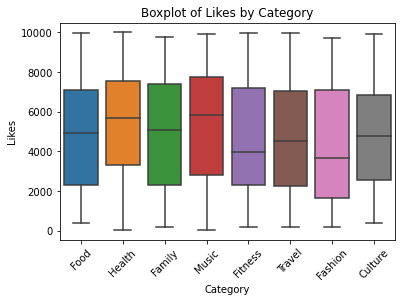

In [29]:
# Create a boxplot
sns.boxplot(data=df, x='Category', y='Likes')
plt.title('Boxplot of Likes by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [30]:
# Calculate the mean of 'Likes'
mean_likes = df['Likes'].mean()
print(f"Mean Likes: {mean_likes:.2f}")

Mean Likes: 4930.71


In [31]:
# Calculate the mean of 'Likes' by Category
mean_likes_by_category = df.groupby('Category')['Likes'].mean()
mean_likes_by_category

Category
Culture    4808.412698
Family     4858.693548
Fashion    4375.255814
Fitness    4674.084746
Food       4833.987013
Health     5527.591549
Music      5366.843750
Travel     4739.754098
Name: Likes, dtype: float64

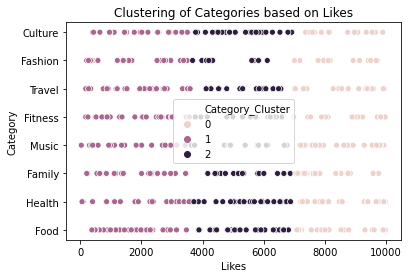

In [35]:
from sklearn.cluster import KMeans

# Cluster Categories based on Likes
X = df[['Likes']]
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
df['Category_Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(data=df, x='Likes', y='Category', hue='Category_Cluster')
plt.title('Clustering of Categories based on Likes')
plt.show()


### Conclusion
##### I used an organized procedure to generate random data, make a Pandas DataFrame, clean the data, visualize it, and run some basic statistics for this project. The project's essential steps are as follows.
1. Creating Random Data: Using Python and tools like NumPy and Pandas, I created random data for the "Date," "Category," and "Likes" fields.
2. Data Cleaning: To get the data ready for analysis, I cleaned it up by eliminating duplicate rows and null values.
3. Data Visualization: I created a boxplot and a histogram using Matplotlib and Seaborn. These graphics shed light on how likes are distributed and how they change between categories.
4. Data analysis: I computed the mean of "Likes" for each category and for the overall dataset using simple statistics.
5. Data Presentation: I used statistics and graphics to clearly and concisely convey the results.

### Key Results:
1. The distribution of the 'Likes' data was displayed by the histogram, which indicated that the majority of likes fell within a particular range.
2. The boxplot showed the distribution of likes within the various categories, with differences in the median and spread.
3. Understanding the average likes was made possible by looking at the mean likes across the board and by category.


This project shows off my proficiency with Pandas, Seaborn, and Python in the generation, cleaning, visualization, and analysis of data. The thorough approach to data acquisition, cleaning, visualization, and analysis is what distinguishes this portfolio project. It displays my aptitude for data processing, data visualization, and fundamental statistics—skills important for data analysis and decision-making.

### Enhancements and Upcoming Projects:

- To extract more information from the data, use more sophisticated data analysis methods like clustering or regression analysis.

- Using programs like Plotly or Tableau, create an interactive dashboard that facilitates dynamic data filtering and exploration for data exploration.

- To acquire more profound understanding and come to more significant conclusions, gather and examine a bigger dataset with a wider range of characteristics.
